In [ ]:
import pandas as pd

Data obtained from http://biostat.mc.vanderbilt.edu/DataSets".


In [ ]:
nhanes = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/nhgh.tsv',sep ='\t')

In [ ]:
nhanes.head(20)

,seqn,sex,age,re,income,tx,dx,wt,ht,bmi,leg,arml,armc,waist,tri,sub,gh,albumin,bun,SCr
0,51624,male,34.166667,Non-Hispanic White,"[25000,35000)",0,0,87.4,164.7,32.22,41.5,40.0,36.4,100.4,16.4,24.9,5.2,4.8,6.0,0.94
1,51626,male,16.833333,Non-Hispanic Black,"[45000,55000)",0,0,72.3,181.3,22.00,42.0,39.5,26.6,74.7,10.2,10.5,5.7,4.6,9.0,0.89
2,51628,female,60.166667,Non-Hispanic Black,"[10000,15000)",1,1,116.8,166.0,42.39,35.3,39.0,42.2,118.2,29.6,35.6,6.0,3.9,10.0,1.11
3,51629,male,26.083333,Mexican American,"[25000,35000)",0,0,97.6,173.0,32.61,41.7,38.7,37.0,103.7,19.0,23.2,5.1,4.2,8.0,0.80
4,51630,female,49.666667,Non-Hispanic White,"[35000,45000)",0,0,86.7,168.4,30.57,37.5,36.1,33.3,107.8,30.3,28.0,5.3,4.3,13.0,0.79
5,51633,male,80.000000,Non-Hispanic White,"[15000,20000)",0,1,79.1,174.3,26.04,42.8,40.0,30.2,91.1,8.6,15.2,5.4,4.3,16.0,0.83
6,51635,male,80.000000,Non-Hispanic White,"[15000,20000)",1,1,89.6,180.1,27.62,43.0,41.7,33.3,113.7,19.4,26.2,6.8,4.3,16.0,0.90
7,51640,male,17.416667,Other Hispanic,"[10000,15000)",0,0,74.7,169.6,25.97,39.8,38.1,33.4,86.0,12.4,15.0,5.1,4.7,11.0,1.00
8,51641,male,13.000000,Non-Hispanic Black,"[75000,100000)",0,0,40.6,156.4,16.60,39.2,33.4,23.0,63.6,13.8,7.6,5.6,4.3,10.0,0.46
9,51643,female,43.000000,Non-Hispanic Black,"[35000,45000)",1,1,107.7,164.3,39.90,32.7,36.5,39.6,129.8,27.0,NaN,11.0,3.6,16.0,2.54


In [ ]:
nhanes.shape

(6795, 20)

Feature selection - 
The main featutes out of the 20 columns is chosen based on the importance of the diabetes causing and prediction indicators. Also based on the blood glucose ranges.

1. unique identifier - seqn
2. Gender - Sex
3. Age
4. physical attributes - Weight(wt), Height(ht), BMI, High waist circumference(waist)
5. Glucose -  Glycoheamoglobin(gh)
6. Albumin, blood urea nitogrn content(BUN), Creatinine(SCr)



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


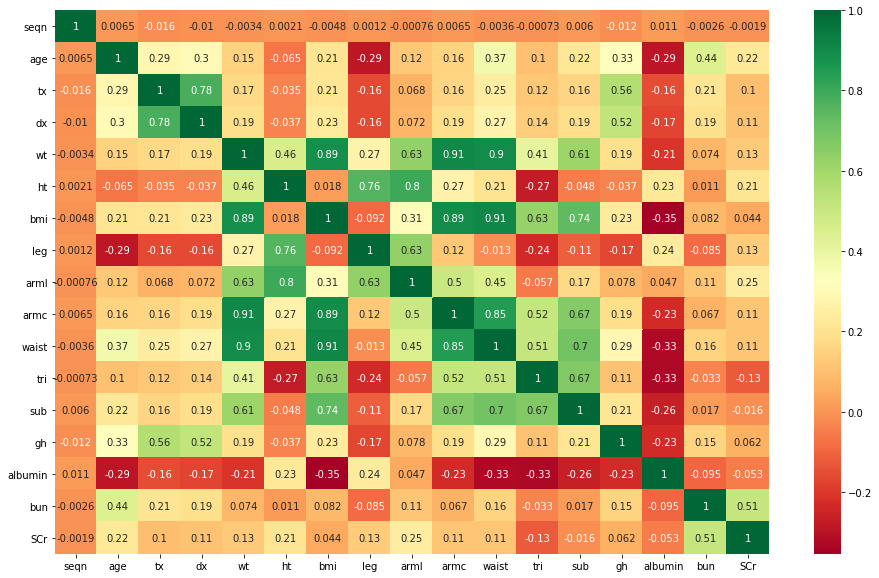

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

X = nhanes.iloc[:,0:20]  #independent columns

#get correlations of each features in dataset
corrmat = nhanes.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,10))
#plot heat map
g=sns.heatmap(nhanes[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
corrmat 
#top_corr_features 

,seqn,age,tx,dx,wt,ht,bmi,leg,arml,armc,waist,tri,sub,gh,albumin,bun,SCr
seqn,1.000000,0.006522,-0.015795,-0.010337,-0.003419,0.002080,-0.004782,0.001177,-0.000763,0.006467,-0.003633,-0.000729,0.006023,-0.011620,0.011264,-0.002612,-0.001885
age,0.006522,1.000000,0.285142,0.300478,0.148607,-0.065289,0.209068,-0.285948,0.123960,0.157683,0.373501,0.101468,0.217317,0.329037,-0.294310,0.440729,0.224004
tx,-0.015795,0.285142,1.000000,0.781226,0.170222,-0.035375,0.211768,-0.161217,0.068130,0.161668,0.248576,0.122907,0.160323,0.558510,-0.158683,0.211099,0.099756
dx,-0.010337,0.300478,0.781226,1.000000,0.187924,-0.036532,0.232171,-0.162839,0.072114,0.186973,0.271778,0.139636,0.188773,0.523509,-0.170359,0.194112,0.110616
wt,-0.003419,0.148607,0.170222,0.187924,1.000000,0.463314,0.887547,0.267828,0.632382,0.905456,0.898307,0.407766,0.610615,0.191428,-0.210422,0.074347,0.130654
ht,0.002080,-0.065289,-0.035375,-0.036532,0.463314,1.000000,0.018150,0.761027,0.799817,0.266974,0.205808,-0.272477,-0.048461,-0.036931,0.225015,0.010553,0.209656
bmi,-0.004782,0.209068,0.211768,0.232171,0.887547,0.018150,1.000000,-0.092200,0.309930,0.894753,0.913802,0.626332,0.737674,0.233976,-0.354591,0.081858,0.044338
leg,0.001177,-0.285948,-0.161217,-0.162839,0.267828,0.761027,-0.092200,1.000000,0.631942,0.124547,-0.012793,-0.237763,-0.111230,-0.167727,0.235671,-0.085340,0.133994
arml,-0.000763,0.123960,0.068130,0.072114,0.632382,0.799817,0.309930,0.631942,1.000000,0.499440,0.453988,-0.057428,0.172157,0.077672,0.047014,0.111262,0.247941
armc,0.006467,0.157683,0.161668,0.186973,0.905456,0.266974,0.894753,0.124547,0.499440,1.000000,0.849151,0.516610,0.665283,0.189877,-0.232586,0.066529,0.114692


In [ ]:
nhanes_subset = nhanes[['seqn','sex','age','tx','dx','wt','ht','bmi','waist','sub','gh','albumin','bun','SCr']].copy()

In [ ]:
nhanes_subset.head(), nhanes_subset.shape

(    seqn     sex        age  tx  dx  ...   sub   gh  albumin   bun   SCr
 0  51624    male  34.166667   0   0  ...  24.9  5.2      4.8   6.0  0.94
 1  51626    male  16.833333   0   0  ...  10.5  5.7      4.6   9.0  0.89
 2  51628  female  60.166667   1   1  ...  35.6  6.0      3.9  10.0  1.11
 3  51629    male  26.083333   0   0  ...  23.2  5.1      4.2   8.0  0.80
 4  51630  female  49.666667   0   0  ...  28.0  5.3      4.3  13.0  0.79
 
 [5 rows x 14 columns], (6795, 14))

In [ ]:
nhanes_subset['gh'].nunique()

99

In [ ]:
nhanes_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6795 entries, 0 to 6794
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   seqn     6795 non-null   int64  
 1   sex      6795 non-null   object 
 2   age      6795 non-null   float64
 3   tx       6795 non-null   int64  
 4   dx       6795 non-null   int64  
 5   wt       6795 non-null   float64
 6   ht       6795 non-null   float64
 7   bmi      6795 non-null   float64
 8   waist    6556 non-null   float64
 9   sub      5824 non-null   float64
 10  gh       6795 non-null   float64
 11  albumin  6706 non-null   float64
 12  bun      6706 non-null   float64
 13  SCr      6706 non-null   float64
dtypes: float64(10), int64(3), object(1)
memory usage: 743.3+ KB


In [ ]:
nhanes_subset.isna().sum()

seqn         0
sex          0
age          0
tx           0
dx           0
wt           0
ht           0
bmi          0
waist      239
sub        971
gh           0
albumin     89
bun         89
SCr         89
dtype: int64

In [ ]:
nhanes_subset.dropna(inplace=True)

In [ ]:
nhanes_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5732 entries, 0 to 6794
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   seqn     5732 non-null   int64  
 1   sex      5732 non-null   object 
 2   age      5732 non-null   float64
 3   tx       5732 non-null   int64  
 4   dx       5732 non-null   int64  
 5   wt       5732 non-null   float64
 6   ht       5732 non-null   float64
 7   bmi      5732 non-null   float64
 8   waist    5732 non-null   float64
 9   sub      5732 non-null   float64
 10  gh       5732 non-null   float64
 11  albumin  5732 non-null   float64
 12  bun      5732 non-null   float64
 13  SCr      5732 non-null   float64
dtypes: float64(10), int64(3), object(1)
memory usage: 671.7+ KB


In [ ]:
nhanes_subset['gh_cat'] = nhanes_subset['gh'].map(lambda x:int(2) if x>=6.5 else int(0) if x<5.7 else int(1) )

In [ ]:
nhanes_subset.head(30)

,seqn,sex,age,tx,dx,wt,ht,bmi,waist,sub,gh,albumin,bun,SCr,gh_cat
0,51624,male,34.166667,0,0,87.4,164.7,32.22,100.4,24.9,5.2,4.8,6.0,0.94,0
1,51626,male,16.833333,0,0,72.3,181.3,22.00,74.7,10.5,5.7,4.6,9.0,0.89,1
2,51628,female,60.166667,1,1,116.8,166.0,42.39,118.2,35.6,6.0,3.9,10.0,1.11,1
3,51629,male,26.083333,0,0,97.6,173.0,32.61,103.7,23.2,5.1,4.2,8.0,0.80,0
4,51630,female,49.666667,0,0,86.7,168.4,30.57,107.8,28.0,5.3,4.3,13.0,0.79,0
5,51633,male,80.000000,0,1,79.1,174.3,26.04,91.1,15.2,5.4,4.3,16.0,0.83,0
6,51635,male,80.000000,1,1,89.6,180.1,27.62,113.7,26.2,6.8,4.3,16.0,0.90,2
7,51640,male,17.416667,0,0,74.7,169.6,25.97,86.0,15.0,5.1,4.7,11.0,1.00,0
8,51641,male,13.000000,0,0,40.6,156.4,16.60,63.6,7.6,5.6,4.3,10.0,0.46,0
11,51647,female,45.166667,0,0,75.7,166.7,27.24,84.8,7.7,5.1,4.4,6.0,0.86,0


In [ ]:
age_ranges = ["[{0} - {1})".format(age, age + 10) for age in range(20, 100, 10)]
age_ranges

['[20 - 30)',
 '[30 - 40)',
 '[40 - 50)',
 '[50 - 60)',
 '[60 - 70)',
 '[70 - 80)',
 '[80 - 90)',
 '[90 - 100)']

In [ ]:
count_unique_age_ranges = len(age_ranges)
count_unique_age_ranges

8

In [ ]:
nhanes_subset['age_range'] = pd.cut(x=nhanes_subset['age'], bins=count_unique_age_ranges, labels=age_ranges)

In [ ]:
nhanes_subset.head()

,seqn,sex,age,tx,dx,wt,ht,bmi,waist,sub,gh,albumin,bun,SCr,gh_cat,age_range
0,51624,male,34.166667,0,0,87.4,164.7,32.22,100.4,24.9,5.2,4.8,6.0,0.94,0,[40 - 50)
1,51626,male,16.833333,0,0,72.3,181.3,22.00,74.7,10.5,5.7,4.6,9.0,0.89,1,[20 - 30)
2,51628,female,60.166667,1,1,116.8,166.0,42.39,118.2,35.6,6.0,3.9,10.0,1.11,1,[70 - 80)
3,51629,male,26.083333,0,0,97.6,173.0,32.61,103.7,23.2,5.1,4.2,8.0,0.80,0,[30 - 40)
4,51630,female,49.666667,0,0,86.7,168.4,30.57,107.8,28.0,5.3,4.3,13.0,0.79,0,[60 - 70)


In [ ]:
nhanes_subset.describe()

,seqn,age,tx,dx,wt,ht,bmi,waist,sub,gh,albumin,bun,SCr,gh_cat
count,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000
mean,56882.319086,43.616626,0.073796,0.113224,75.873186,167.071267,27.074956,93.571092,19.926396,5.609037,4.300314,12.859909,0.870876,0.393754
std,3052.766385,20.915520,0.261462,0.316894,18.535158,10.235240,5.735909,15.207169,8.344429,0.871791,0.317934,5.579434,0.424300,0.621307
min,51624.000000,12.000000,0.000000,0.000000,28.000000,135.400000,13.180000,52.000000,3.800000,4.000000,2.500000,1.000000,0.140000,0.000000
25%,54249.500000,24.000000,0.000000,0.000000,62.700000,159.700000,22.917500,82.200000,13.000000,5.200000,4.100000,9.000000,0.700000,0.000000
50%,56878.500000,43.000000,0.000000,0.000000,74.000000,166.600000,26.560000,93.200000,19.250000,5.400000,4.300000,12.000000,0.820000,0.000000
75%,59549.250000,61.083333,0.000000,0.000000,87.100000,174.500000,30.332500,103.500000,26.000000,5.800000,4.500000,15.000000,0.970000,1.000000
max,62160.000000,80.000000,1.000000,1.000000,176.600000,202.700000,55.040000,160.600000,40.400000,15.500000,5.300000,90.000000,15.660000,2.000000


Exploratory Data Analysis to learn about the data and model training

In [ ]:
nhanes_subset['sex'].value_counts()

male      2898
female    2834
Name: sex, dtype: int64

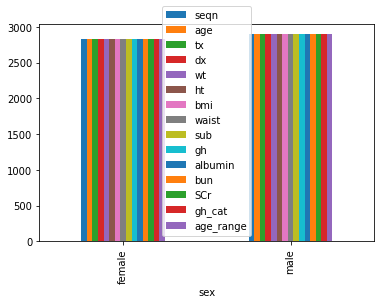

In [ ]:
nhanes_subset.groupby('sex').count().plot.bar()

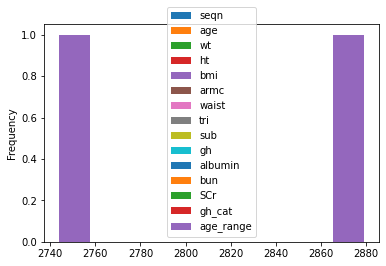

In [ ]:
nhanes_subset.groupby('sex').count().plot.hist()

In [ ]:
nhanes_subset['age_range'].value_counts()

[20 - 30)     1143
[90 - 100)     729
[50 - 60)      716
[60 - 70)      673
[30 - 40)      666
[70 - 80)      659
[40 - 50)      618
[80 - 90)      528
Name: age_range, dtype: int64

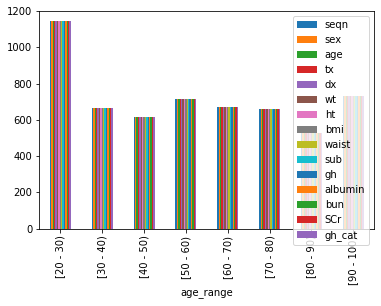

In [ ]:
nhanes_subset.groupby('age_range').count().plot.bar()

In [ ]:
nhanes_subset['gh_cat'].value_counts()

0    3897
1    1413
2     422
Name: gh_cat, dtype: int64

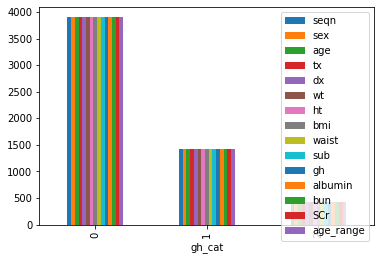

In [ ]:
nhanes_subset.groupby('gh_cat').count().plot.bar()

In [ ]:
nhanes_subset.head()

,seqn,sex,age,tx,dx,wt,ht,bmi,waist,sub,gh,albumin,bun,SCr,gh_cat,age_range
0,51624,male,34.166667,0,0,87.4,164.7,32.22,100.4,24.9,5.2,4.8,6.0,0.94,0,[40 - 50)
1,51626,male,16.833333,0,0,72.3,181.3,22.00,74.7,10.5,5.7,4.6,9.0,0.89,1,[20 - 30)
2,51628,female,60.166667,1,1,116.8,166.0,42.39,118.2,35.6,6.0,3.9,10.0,1.11,1,[70 - 80)
3,51629,male,26.083333,0,0,97.6,173.0,32.61,103.7,23.2,5.1,4.2,8.0,0.80,0,[30 - 40)
4,51630,female,49.666667,0,0,86.7,168.4,30.57,107.8,28.0,5.3,4.3,13.0,0.79,0,[60 - 70)


In [ ]:
nhanes_subset2 = nhanes_subset[['tx','dx','wt','ht','bmi','waist','sub','gh','albumin','bun','SCr','gh_cat']].copy()

In [ ]:
corr = nhanes_subset2.corr()
corr

,tx,dx,wt,ht,bmi,waist,sub,gh,albumin,bun,SCr,gh_cat
tx,1.000000,0.766788,0.115927,-0.060843,0.176425,0.215335,0.158229,0.549234,-0.134829,0.196073,0.064596,0.554723
dx,0.766788,1.000000,0.143235,-0.054779,0.201677,0.247485,0.183138,0.518504,-0.146524,0.182170,0.081421,0.527712
wt,0.115927,0.143235,1.000000,0.511006,0.856324,0.873275,0.609409,0.153430,-0.134406,0.101075,0.152553,0.188891
ht,-0.060843,-0.054779,0.511006,1.000000,0.006959,0.200707,-0.048996,-0.048385,0.230162,0.012039,0.223118,-0.074437
bmi,0.176425,0.201677,0.856324,0.006959,1.000000,0.898984,0.739213,0.207826,-0.295475,0.113379,0.048440,0.266782
waist,0.215335,0.247485,0.873275,0.200707,0.898984,1.000000,0.699390,0.269155,-0.277664,0.191404,0.118702,0.332173
sub,0.158229,0.183138,0.609409,-0.048996,0.739213,0.699390,1.000000,0.210719,-0.263390,0.017523,-0.012243,0.250996
gh,0.549234,0.518504,0.153430,-0.048385,0.207826,0.269155,0.210719,1.000000,-0.209042,0.151156,0.045476,0.763838
albumin,-0.134829,-0.146524,-0.134406,0.230162,-0.295475,-0.277664,-0.263390,-0.209042,1.000000,-0.094996,-0.042353,-0.230647
bun,0.196073,0.182170,0.101075,0.012039,0.113379,0.191404,0.017523,0.151156,-0.094996,1.000000,0.487647,0.222592


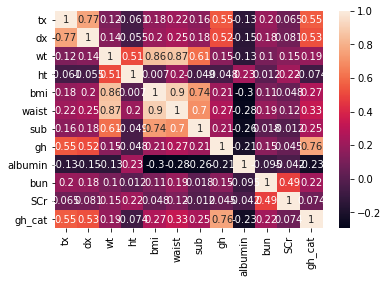

In [ ]:
import seaborn as sns
sns.heatmap(corr,annot = True)


In [ ]:
nhanes_subset2.head()

,tx,dx,wt,ht,bmi,waist,sub,gh,albumin,bun,SCr,gh_cat
0,0,0,87.4,164.7,32.22,100.4,24.9,5.2,4.8,6.0,0.94,0
1,0,0,72.3,181.3,22.00,74.7,10.5,5.7,4.6,9.0,0.89,1
2,1,1,116.8,166.0,42.39,118.2,35.6,6.0,3.9,10.0,1.11,1
3,0,0,97.6,173.0,32.61,103.7,23.2,5.1,4.2,8.0,0.80,0
4,0,0,86.7,168.4,30.57,107.8,28.0,5.3,4.3,13.0,0.79,0


In [ ]:
nhanes_subset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5732 entries, 0 to 6794
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tx       5732 non-null   int64  
 1   dx       5732 non-null   int64  
 2   wt       5732 non-null   float64
 3   ht       5732 non-null   float64
 4   bmi      5732 non-null   float64
 5   waist    5732 non-null   float64
 6   sub      5732 non-null   float64
 7   gh       5732 non-null   float64
 8   albumin  5732 non-null   float64
 9   bun      5732 non-null   float64
 10  SCr      5732 non-null   float64
 11  gh_cat   5732 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 582.2 KB


In [ ]:
nhanes_subset2.isna().sum()

tx         0
dx         0
wt         0
ht         0
bmi        0
waist      0
sub        0
gh         0
albumin    0
bun        0
SCr        0
gh_cat     0
dtype: int64

In [ ]:
#nhanes_sub2.dropna(inplace=True)

In [ ]:
#nhanes_sub2.info()

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set,train_label,test_label = train_test_split(nhanes_subset2[['tx','dx','wt','ht','bmi','waist','sub','gh','albumin','bun','SCr']],nhanes_subset2['gh_cat'],
                                                              test_size=0.33,random_state=42)

In [ ]:
train_set, test_set,train_label,test_label

(      tx  dx     wt     ht    bmi  waist   sub   gh  albumin   bun   SCr
 4277   0   0   95.3  167.9  33.81  114.3  29.0  5.9      4.6  10.0  0.74
 809    0   0   81.9  167.5  29.19  105.8  24.0  5.0      4.2  10.0  0.63
 4345   0   0   57.1  162.6  21.60   78.2  12.0  5.2      4.3   9.0  0.81
 5089   0   0   78.8  178.5  24.73   91.2  12.8  5.5      4.3  28.0  1.24
 6283   0   0   75.5  167.1  27.04   93.9  16.0  5.4      4.2  11.0  0.76
 ...   ..  ..    ...    ...    ...    ...   ...  ...      ...   ...   ...
 4477   0   0  105.0  176.4  33.74  101.4  36.0  5.1      3.8  15.0  2.19
 6174   0   0  108.2  172.0  36.57  132.8  26.0  7.4      3.9  15.0  1.10
 6212   0   0   78.1  175.4  25.39   92.6  12.0  5.9      4.9  12.0  1.05
 6404   0   0   73.0  177.8  23.09   86.0  11.4  5.4      4.4  10.0  1.06
 1016   1   1   80.7  178.0  25.47   98.9  20.2  7.3      4.3  10.0  0.96
 
 [3840 rows x 11 columns],
       tx  dx    wt     ht    bmi  waist   sub   gh  albumin   bun   SCr
 4987   0 

In [ ]:
from sklearn.preprocessing import MinMaxScaler as Scaler
scaler = Scaler()
scaler.fit(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from xgboost.sklearn import XGBClassifier

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver ='lbfgs',multi_class='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('XGB',XGBClassifier()))

In [ ]:
results = []
names = []
X = train_set_scaled
y = train_label
seed = 5

In [ ]:
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y,cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {} ({})". format(name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR: 0.8268229166666666 (0.013643944684822648)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.7705729166666666 (0.023247201985908142)
NB: 0.84921875 (0.019223266181208922)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVC: 0.8958333333333334 (0.015362376253908992)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RFC: 1.0 (0.0)
DTR: 1.0 (0.0)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGB: 1.0 (0.0)


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
Decision_tree_model = DecisionTreeRegressor()
Decision_tree_model.fit(train_set_scaled,train_label)
Decision_tree_prediction = Decision_tree_model.predict(test_set_scaled)

In [ ]:
print( 'Decision Tree Classification Report:\n', classification_report(test_label,Decision_tree_prediction,target_names=['0','1','2']))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1276
           1       1.00      1.00      1.00       477
           2       1.00      1.00      1.00       139

    accuracy                           1.00      1892
   macro avg       1.00      1.00      1.00      1892
weighted avg       1.00      1.00      1.00      1892



In [ ]:
print('Decision Tree Accuracy Score:\n', accuracy_score(test_label,Decision_tree_prediction))

Decision Tree Accuracy Score:
 1.0


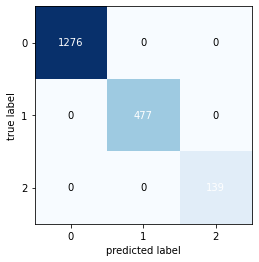

In [ ]:
Decision_tree_matrix = confusion_matrix(test_label,Decision_tree_prediction)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


fig, ax = plot_confusion_matrix(conf_mat=Decision_tree_matrix)
plt.show()

In [ ]:
importance = Decision_tree_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 1.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000


In [ ]:
Logistic_regression_model = LogisticRegression(solver ='lbfgs',multi_class='auto')
Logistic_regression_model.fit(train_set_scaled,train_label)
Logistic_regression_prediction = Logistic_regression_model.predict(test_set_scaled)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print( 'Logistic Regression Classification Report:\n', classification_report(test_label,Logistic_regression_prediction,target_names=['0','1','2']))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90      1242
           1       0.73      0.46      0.56       475
           2       1.00      0.53      0.69       139

    accuracy                           0.82      1856
   macro avg       0.85      0.66      0.72      1856
weighted avg       0.82      0.82      0.80      1856



In [ ]:
print('Logistic Regression Accuracy Score:\n', accuracy_score(test_label,Logistic_regression_prediction))

Logistic Regression Accuracy Score:
 0.818426724137931


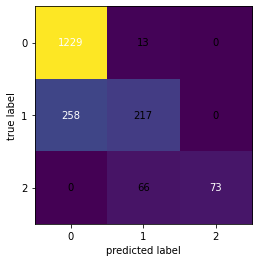

In [ ]:
Logistic_regression_matrix = confusion_matrix(test_label,Logistic_regression_prediction)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


fig, ax = plot_confusion_matrix(conf_mat=Logistic_regression_matrix,cmap='viridis')
plt.show()

In [ ]:
Naive_model = GaussianNB()
Naive_model.fit(train_set_scaled,train_label)
Naive_prediction = Naive_model.predict(test_set_scaled)

In [ ]:
print( 'Naive Bays Classification Report:\n', classification_report(test_label,Naive_prediction,target_names=['0','1','2']))

Naive Bays Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92      1242
           1       0.82      0.80      0.81       475
           2       0.68      0.96      0.79       139

    accuracy                           0.88      1856
   macro avg       0.81      0.89      0.84      1856
weighted avg       0.89      0.88      0.88      1856



In [ ]:
print('Naive Bays Accuracy Score:\n', accuracy_score(test_label,Naive_prediction))

Naive Bays Accuracy Score:
 0.8798491379310345


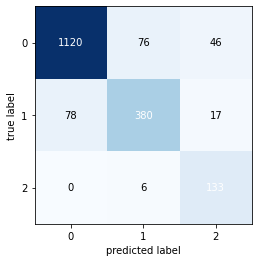

In [ ]:
Naive_matrix = confusion_matrix(test_label,Naive_prediction)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


fig, ax = plot_confusion_matrix(conf_mat=Naive_matrix)
plt.show()

In [ ]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(train_set_scaled,train_label)
KNN_prediction = KNN_model.predict(test_set_scaled)

In [ ]:
print( 'KNN Classification Report:\n', classification_report(test_label,KNN_prediction,target_names=['0','1','2']))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      1242
           1       0.53      0.37      0.44       475
           2       1.00      0.47      0.64       139

    accuracy                           0.75      1856
   macro avg       0.77      0.59      0.64      1856
weighted avg       0.74      0.75      0.73      1856



In [ ]:
print('KNN Accuracy Score:\n', accuracy_score(test_label,KNN_prediction))

KNN Accuracy Score:
 0.7483836206896551


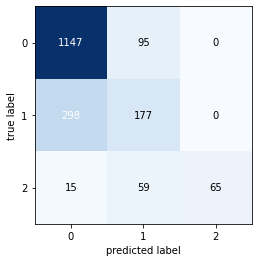

In [ ]:
KNN_matrix = confusion_matrix(test_label,KNN_prediction)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


fig, ax = plot_confusion_matrix(conf_mat=KNN_matrix)
plt.show()

In [ ]:
SV_model = SVC(gamma='scale')
SV_model.fit(train_set_scaled,train_label)
SV_prediction = SV_model.predict(test_set_scaled)

In [ ]:
print( 'SVC Classification Report:\n', classification_report(test_label,SV_prediction,target_names=['0','1','2']))

SVC Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1276
           1       0.85      0.71      0.77       477
           2       0.92      0.73      0.81       139

    accuracy                           0.89      1892
   macro avg       0.89      0.81      0.84      1892
weighted avg       0.89      0.89      0.89      1892



In [ ]:
print(' SVC Accuracy Score:\n', accuracy_score(test_label,SV_prediction))

 SVC Accuracy Score:
 0.8948202959830867


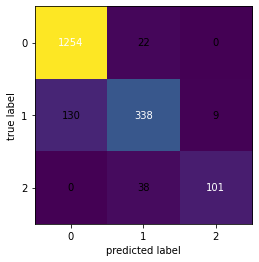

In [ ]:
SV_matrix = confusion_matrix(test_label,SV_prediction)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


fig, ax = plot_confusion_matrix(conf_mat=SV_matrix,cmap='viridis')
plt.show()

In [ ]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(train_set_scaled,train_label)
RF_prediction = RF_model.predict(test_set_scaled)

In [ ]:
print( 'RFC Classification Report:\n', classification_report(test_label,RF_prediction,target_names=['0','1','2']))

RFC Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1242
           1       1.00      1.00      1.00       475
           2       1.00      0.99      0.99       139

    accuracy                           1.00      1856
   macro avg       1.00      1.00      1.00      1856
weighted avg       1.00      1.00      1.00      1856



In [ ]:
print(' RFC Accuracy Score:\n', accuracy_score(test_label,RF_prediction))

 RFC Accuracy Score:
 0.9989224137931034


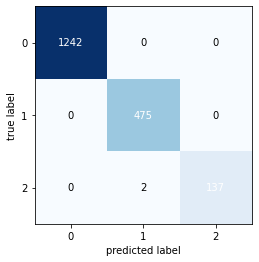

In [ ]:
RF_matrix = confusion_matrix(test_label,RF_prediction)
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


fig, ax = plot_confusion_matrix(conf_mat=RF_matrix)
plt.show()